In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_pics(link):
    mat = []
    f = open(link)
    for l in f.readlines():
        entries = l.split(',')
        mat +=[np.array(entries, dtype = 'float')]
    return np.array(mat)

def cov_mat(vecs):
    cov = vecs.T@vecs/vecs.shape[0]
    return cov

def frac_error(eigenval,idx):
    return 1 - sum(eigenval[-idx:])/sum(eigenval)

def frac_error2(eigenval,idx):
    return 1 - sum(eigenval[:idx])/sum(eigenval)

def project_unproject(img,eigvecs,num_eigv):
    proj = img@eigvecs[:,-num_eigv:] # first, project image down
    unproj = proj@eigvecs[:,-num_eigv:].T
    return unproj

def get_reconstructions(images,eigvecs,num_eigv):
    return [project_unproject(img,eigvecs,num_eigv) for img in images]

In [3]:
vectors = read_pics('./data/faces.csv')

In [4]:
cov = cov_mat(vectors)

In [5]:
w,v = np.linalg.eigh(cov)

In [14]:
#values required in 1.b.1.
for i in [1,2,10,30,50]:
    print(w[-i])
print(sum(w))
print(sum([cov[i,i] for i in range(cov.shape[0])]))

781.8126992600011
161.15157496732652
3.3395867548878235
0.8090877903777204
0.3895777395181451
1084.2074349947666
1084.2074349947688


In [7]:
rec_errors = [frac_error(w,i) for i in range(1,51)]

Text(0.5, 1.0, 'Fractional reconstruction error for the first 50 eigenvalues')

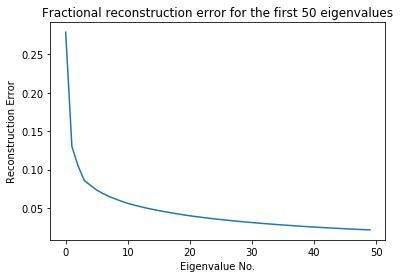

In [15]:
plt.plot(rec_errors)
plt.xlabel('Eigenvalue No.')
plt.ylabel('Reconstruction Error')
plt.title('Fractional reconstruction error for the first 50 eigenvalues')

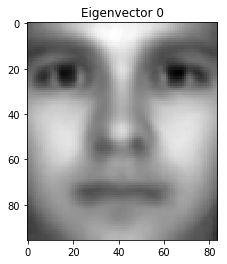

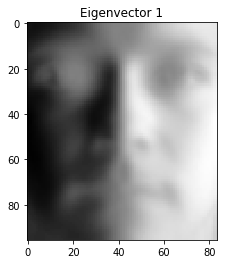

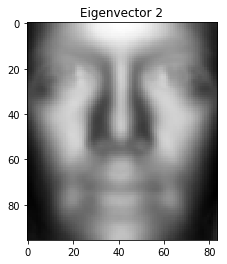

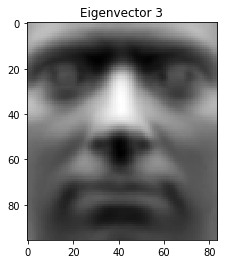

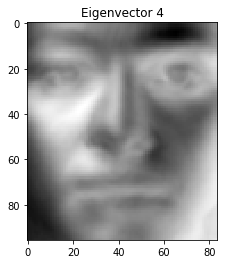

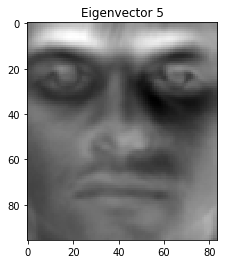

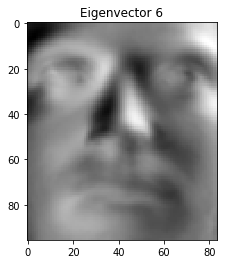

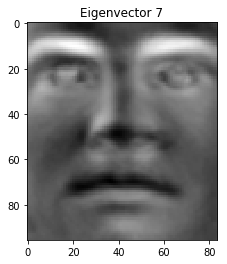

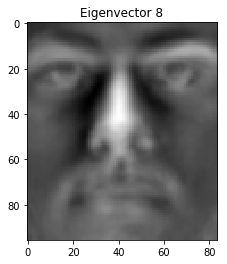

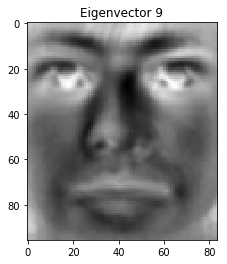

In [9]:
#display the eigenvectors
for i in range(0,10):
    plt.imshow(v[:,-(i+1)].reshape((84,96)).T,cmap='gray')
    plt.title('Eigenvector %d' %(i))
    plt.savefig('./data/eigenvector-'+str(i))
    plt.show()

k= 1


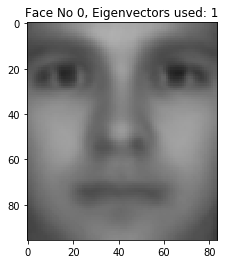

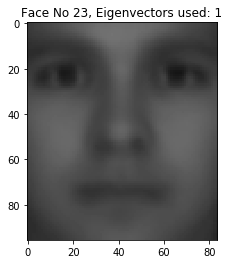

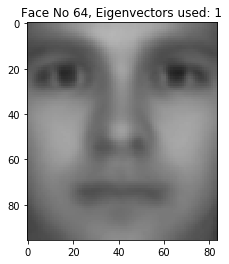

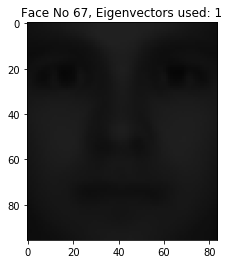

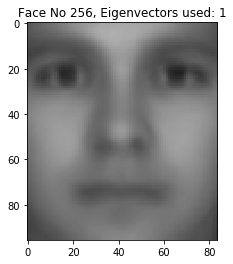

k= 2


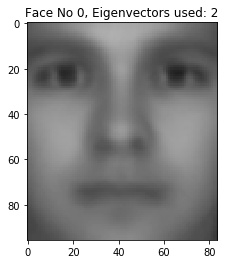

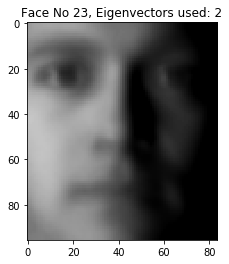

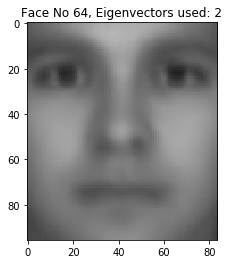

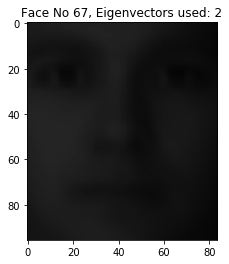

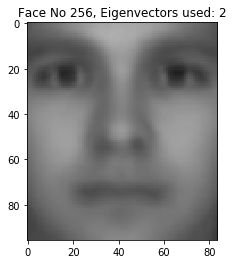

k= 5


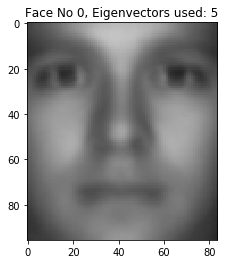

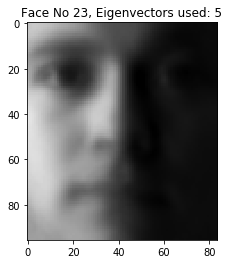

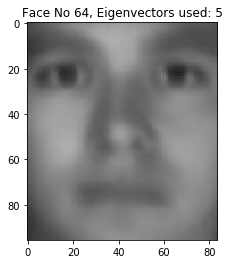

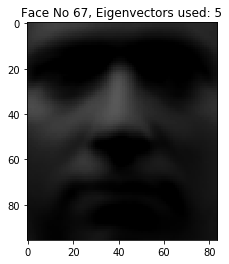

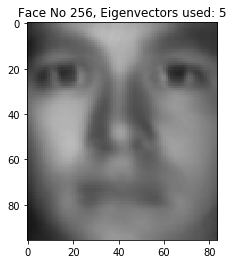

k= 10


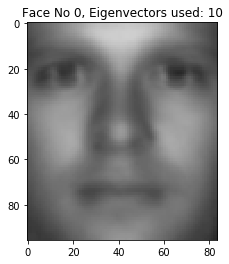

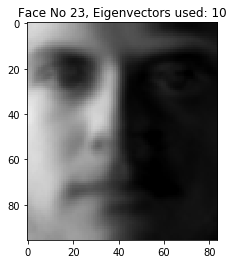

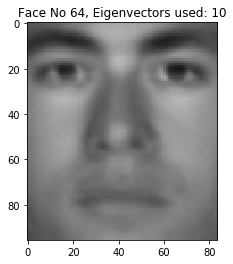

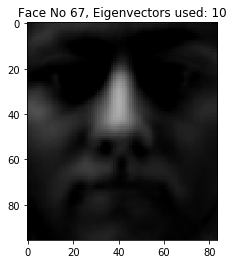

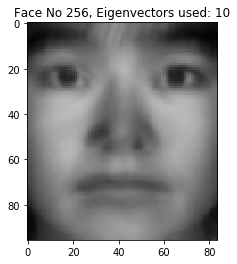

k= 50


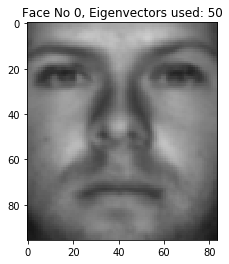

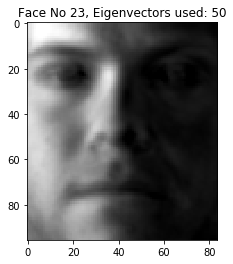

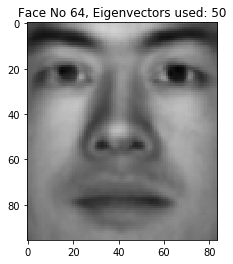

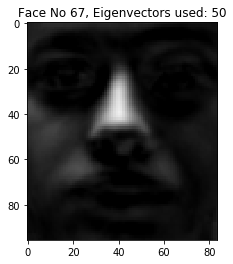

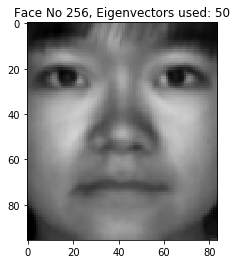

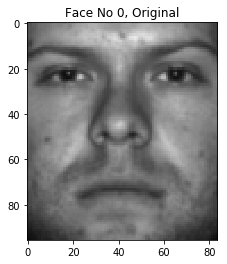

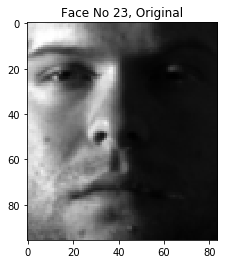

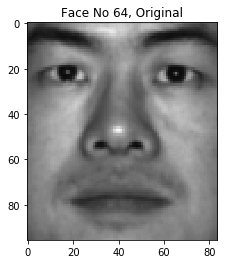

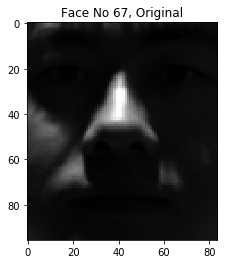

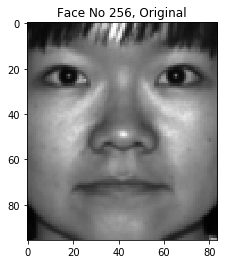

In [12]:
wanted_pics = [vectors[i] for i in [0,23,64,67,256]]
for i in [1,2,5,10,50]:
    rec = get_reconstructions(wanted_pics,v,i)
    print('k=',i)
    for idx,r in zip([0,23,64,67,256],rec):
        plt.imshow(r.reshape((84,96)).T, cmap='gray',vmin=0,vmax=1)
        plt.title('Face No %d, Eigenvectors used: %d' %(idx,i))
        plt.savefig('./data/reconstruction-'+'face-'+str(idx)+'evecs-no'+str(i))
        plt.show()
for idx,p in zip([0,23,64,67,256],wanted_pics):
    plt.imshow(p.reshape((84,96)).T, cmap='gray',vmin=0,vmax=1)
    plt.title('Face No %d, Original' % idx)
    plt.savefig('./data/original-'+'face-'+str(idx))
    plt.show()
